In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def shapley_ish_value(aoh_hum_abs, aoh_interest, aoh_other, aoh_joint):
    return (1 / 2) * ((aoh_interest - aoh_hum_abs) + (aoh_joint - aoh_other))

In [73]:
def prev_partial_method(aoh_hum_abs, aoh_interest, aoh_other, aoh_joint):
    contribution = (aoh_interest - aoh_hum_abs) / ((aoh_interest - aoh_hum_abs) + (aoh_other - aoh_hum_abs))
    return contribution * (aoh_joint - aoh_hum_abs)

/var/folders/dx/6m5829rx52z9xgd_3vp4m4r80000gn/T/ipykernel_17492/2632924594.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  contribution = (aoh_interest - aoh_hum_abs) / ((aoh_interest - aoh_hum_abs) + (aoh_other - aoh_hum_abs))
/var/folders/dx/6m5829rx52z9xgd_3vp4m4r80000gn/T/ipykernel_17492/2632924594.py:2: RuntimeWarning: invalid value encountered in scalar divide
  contribution = (aoh_interest - aoh_hum_abs) / ((aoh_interest - aoh_hum_abs) + (aoh_other - aoh_hum_abs))


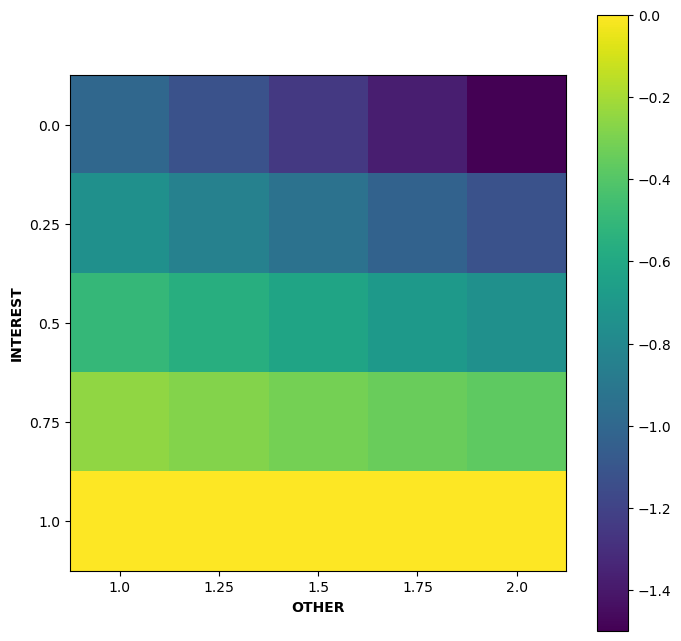

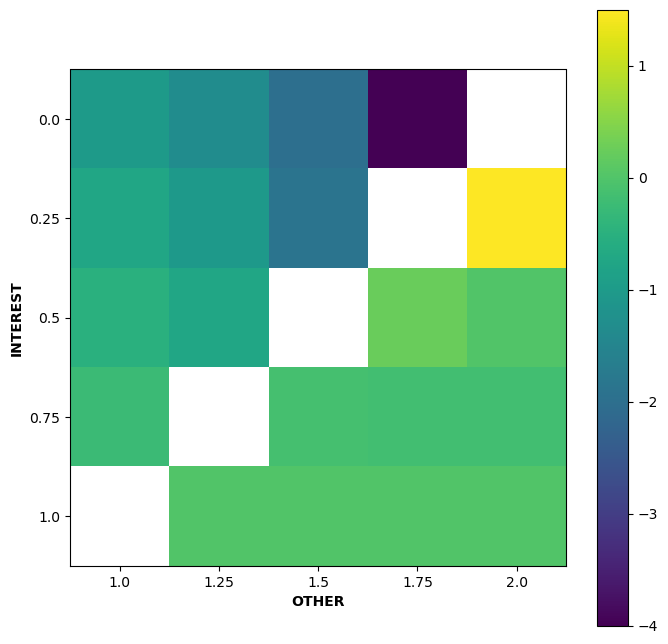

In [88]:
n = 5

aoh_hum_abs = 1
aoh_interest = np.linspace(0, 1, num = n)
aoh_other = np.linspace(1, 2, num = n)

delta_aoh_joint = np.zeros((n, n))

shap_interest = np.zeros((n, n))
shap_other = np.zeros((n, n))

prev_interest = np.zeros((n, n))
prev_other = np.zeros((n, n))

for i, interest in enumerate(aoh_interest):
    for j, other in enumerate(aoh_other):
        joint = 1 * (interest * other)
        delta_aoh_joint[i, j] = joint - 1
        
        val = shapley_ish_value(aoh_hum_abs, interest, other, joint)
        shap_interest[i, j] = val

        val = prev_partial_method(aoh_hum_abs, interest, other, joint)
        prev_interest[i, j] = val

        val = shapley_ish_value(aoh_hum_abs, other, interest, joint)
        shap_other[i, j] = val

        val = prev_partial_method(aoh_hum_abs, other, interest, joint)
        prev_other[i, j] = val

plt.figure(figsize = (8, 8))
plt.imshow(shap_interest)

plt.xticks([i for i in range(n)], labels = np.round(aoh_other, 2))
plt.xlabel('OTHER', weight = 'bold')

plt.yticks([i for i in range(n)], labels = np.round(aoh_interest, 2))
plt.ylabel('INTEREST', weight = 'bold')

plt.colorbar()
plt.show()

plt.figure(figsize = (8, 8))
plt.imshow(prev_interest)

plt.xticks([i for i in range(n)], labels = np.round(aoh_other, 2))
plt.xlabel('OTHER', weight = 'bold')

plt.yticks([i for i in range(n)], labels = np.round(aoh_interest, 2))
plt.ylabel('INTEREST', weight = 'bold')

plt.colorbar()
plt.show()

In [83]:
adds_up = ((np.isclose((shap_interest + shap_other), delta_aoh_joint)).sum() == (n * n))
print('SHAP values add up to delta AOH joint?', adds_up)

SHAP values add up to delta AOH joint? True


In [56]:
shap_interest.diagonal()

array([-0.5       , -0.48979592, -0.45918367, -0.40816327, -0.33673469,
       -0.24489796, -0.13265306,  0.        ])

In [57]:
shap_other.diagonal()

array([-0.5       , -0.48979592, -0.45918367, -0.40816327, -0.33673469,
       -0.24489796, -0.13265306,  0.        ])